In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns

from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten , BatchNormalization ,AveragePooling2D, Activation

import matplotlib.pyplot as plt

In [1]:
TARGET_X = 256
TARGET_Y = 256
BATCH_SIZE = 32
CLASS_NUM = 3
EPOCH = 10

In [3]:
def append_ext(fn):
    return fn+".png"

train_classes=pd.read_csv('./multiclass_v2.csv', dtype=str)
#Changing the attribute ids into lists instead of str seperated by a ' ' to be able to count them
train_classes['attribute_ids']=train_classes['attribute_ids'].str.split(' ')
train_classes["id"]=train_classes["id"].apply(append_ext)


print('train : \n', train_classes.head())

train : 
                      id attribute_ids
0  1000fe2e667721fe.png          [51]
1  10041eb49b297c08.png          [51]
2  100501c227f8beea.png          [13]
3  1008abd71f3ed5bc.png           [1]
4  100a0dcde728cb36.png          [51]


In [4]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.2)

train_gen = datagen.flow_from_dataframe(dataframe= train_classes,
                                             directory='../data',
                                             x_col="id",
                                             y_col="attribute_ids",
                                             subset="training",
                                             target_size = (TARGET_X,TARGET_Y),
                                             batch_size=BATCH_SIZE,
                                             class_name='categorical')

valid_gen = datagen.flow_from_dataframe(dataframe= train_classes,
                                             directory='../data',
                                             x_col="id",
                                             y_col="attribute_ids",
                                             subset="validation",
                                             target_size = (TARGET_X,TARGET_Y),
                                             batch_size=BATCH_SIZE,
                                             class_name='categorical')

Found 17670 validated image filenames belonging to 3 classes.
Found 4417 validated image filenames belonging to 3 classes.


In [5]:
model = Sequential()

model.add(Conv2D(6, 5, activation='relu', input_shape=(TARGET_X,TARGET_Y,3)))
model.add(AveragePooling2D(2))

model.add(Conv2D(16, 5, activation='relu'))
model.add(AveragePooling2D(2))

model.add(Conv2D(120, 5, activation='relu'))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(CLASS_NUM, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 126, 126, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 120)       48120     
_________________________________________________________________
flatten (Flatten)            (None, 389880)            0         
_________________________________________________________________
dense (Dense)                (None, 84)                3

In [6]:
from keras import optimizers

optimizer = optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy", "categorical_accuracy"])

STEP_SIZE_TRAIN = train_gen.n//train_gen.batch_size
STEP_SIZE_VALID = valid_gen.n//valid_gen.batch_size

history = model.fit(train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_gen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=EPOCH,
                    verbose=1)

C:\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
Epoch 1/10
552/552 [==============================] - 525s 923ms/step - loss: 1.0834 - accuracy: 0.4593 - categorical_accuracy: 0.4593 - val_loss: 0.9237 - val_accuracy: 0.5591 - val_categorical_accuracy: 0.5591
Epoch 2/10
552/552 [==============================] - 97s 175ms/step - loss: 0.8739 - accuracy: 0.5867 - categorical_accuracy: 0.5867 - val_loss: 0.8884 - val_accuracy: 0.5824 - val_categorical_accuracy: 0.5824
Epoch 3/10
552/552 [==============================] - 99s 179ms/step - loss: 0.7806 - accuracy: 0.6442 - categorical_accuracy: 0.6442 - val_loss: 0.8626 - val_accuracy: 0.5953 - val_categorical_accuracy: 0.5953
Epoch 4/10
552/552 [==============================] - 103s 187ms/step - loss: 0.6638 - accuracy: 0.7137 - categorical_accuracy: 0.7137 - val_loss: 0.9284 - val_accuracy: 0.5885 - 

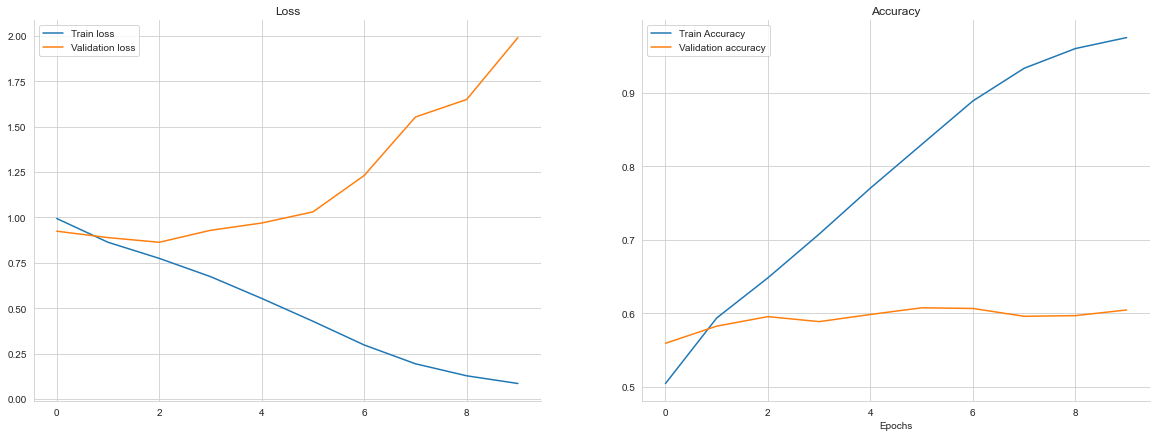

In [7]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(20,7))


ax1.plot(history.history['loss'], label='Train loss')
ax1.plot(history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [7]:
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
<function is_built_with_cuda at 0x0000016870E97160>
